<h1>DRV Analysis</h1>

In [1]:
from properties import vwl_hold, vbl_hold, vblneg_hold, vwl_read, vbl_read, vblneg_read
from properties import vdd_standard, vdd_seevinck, vdd_gaussian_vth
from properties import vsweep_standard, vsweep_seevinck, vsweep_gaussian_vth
from properties import i_leak_n, i_leak_p
from properties import dc_vsweep_gaussian_vth
from properties import rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard, dc_vsweep_seevinck, snm_max, snm_min, w_ax_step_param_seevinck, save_w_ax_seevinck, rit_models_montecarlo, dc_vsweep_gaussian_vth, step_param_run_gaussian_vth
from utils.path import ltspice, schematics, images
from utils.patterns import w_ax_standard_pattern, w_ax_seevinck_pattern, snm_max_seevinck_pattern, snm_min_seevinck_pattern, i_leak_n_pattern, i_leak_p_pattern
from models.snm import graphical_processing, rotate_points, seevinck_processing
from models.ops import save_image, get_data, __init_model__, CircuitType, OperationType
from matplotlib import pyplot as plt
import os
from statistics import mean, stdev

In [2]:
# w_ax pick
w_ax_pos = 1

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/hold/standard_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\standard\hold\standard_hold_1.raw, Log file: data\standard\hold\standard_hold_1.log
File opened successfully: data\standard\hold\standard_hold_1.raw
File updated successfully: ../../images/standard_hold_simulation.png


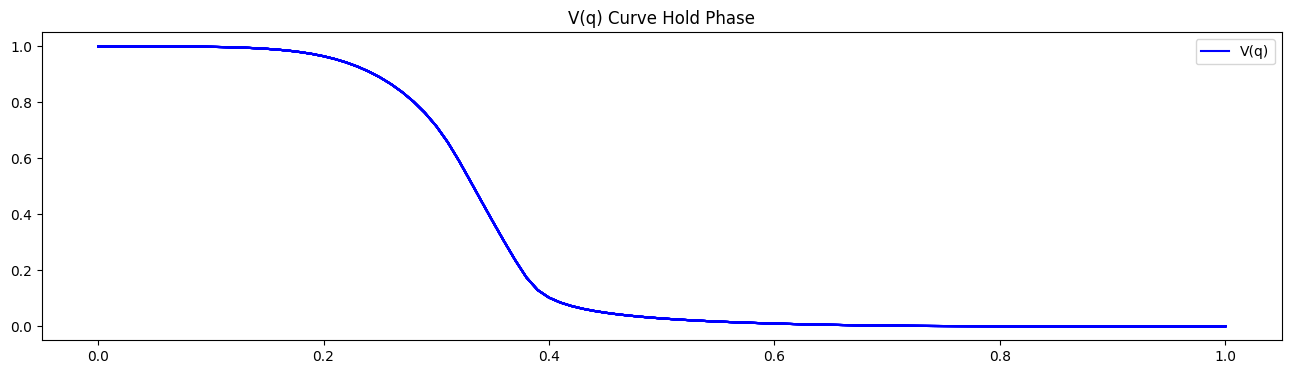

In [3]:
steps, vsweep_standard_hold, v_q_standard_hold, v_q_neg_standard_hold, standard_hold_log = __init_model__(
    operation_type=OperationType.HOLD,
    circuit_type=CircuitType.STANDARD, 
    asc_file_path=os.path.join(ltspice, "standard/hold/standard_hold.asc"),
    schematic_image_path=os.path.join(schematics, "standard.png"),
    vdd=vdd_standard,
    vsweep=vsweep_standard,
    vwl=vwl_hold,
    vbl=vbl_hold,
    vblneg=vblneg_hold,
    params=[rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard]
)

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Hold Phase")
plt.legend(["V(q)"])
save_image(image_path=os.path.join(images, "standard_hold_simulation.png"), plt=plt)
plt.show()

w_ax_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]


Text(0.5, 1.0, 'W AX Trend Hold Phase')

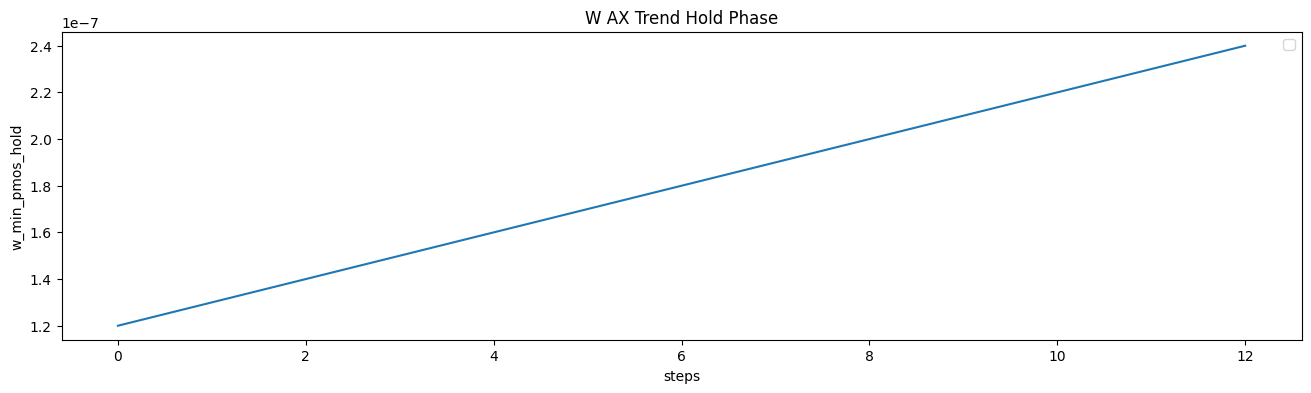

In [4]:
standard_hold_log_file_path = f"./{standard_hold_log}"

with open(standard_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_standard_hold = get_data(pattern=w_ax_standard_pattern, content=content)
print(f'w_ax_standard_hold = {w_ax_standard_hold}')

plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_hold'])
plt.plot(w_ax_standard_hold, label='w_ax_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')

snm_standard_hold[w_ax_pos=1.3e-07 u] = 262.43550473079256
File updated successfully: ../../images/butterfly_curve_standard_hold.png


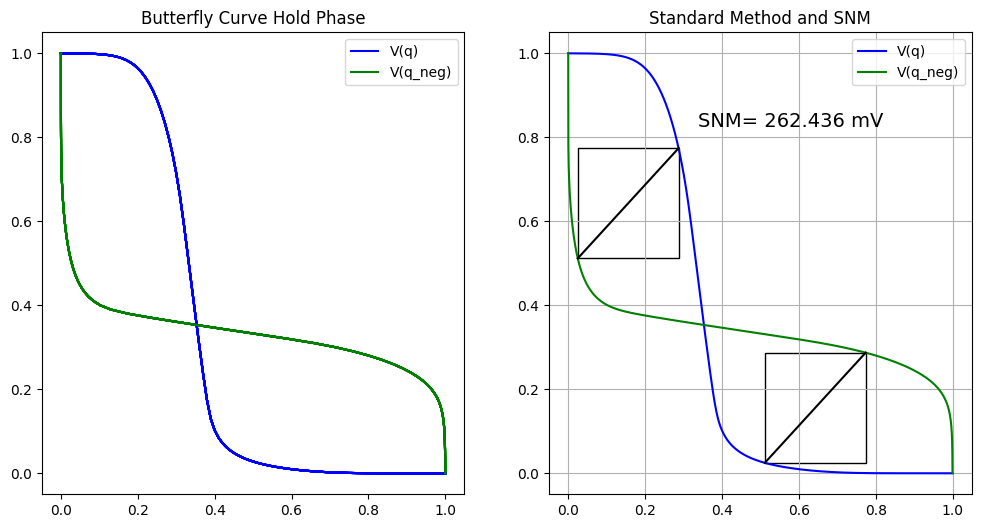

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_hold = []
vq_standard_hold = []
x_vqneg_standard_hold = [] 
vqneg_standard_hold = []
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    x_vq_standard_hold.append(x)
    vq_standard_hold.append(vq)
    x_vqneg_standard_hold.append(vq)
    vqneg_standard_hold.append(x)
    axs[0].plot(x, vq, label=steps[step], color='blue')
    axs[0].plot(vq, x, label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Hold Phase")
axs[0].legend(["V(q)", "V(q_neg)"])

# graphical method
snm_standard_hold = graphical_processing(
    x_vq=x_vq_standard_hold[w_ax_pos], 
    vq=vq_standard_hold[w_ax_pos], 
    x_vqneg=x_vqneg_standard_hold[w_ax_pos], 
    vqneg=vqneg_standard_hold[w_ax_pos], ax=axs[1]
)
print(f'snm_standard_hold[w_ax_pos={w_ax_standard_hold[w_ax_pos]} u] = {snm_standard_hold}')

save_image(image_path=os.path.join(images, "butterfly_curve_standard_hold.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/read/standard_read.asc
Successful/Total Simulations: 0/1
Raw file: data\standard\read\standard_read_1.raw, Log file: data\standard\read\standard_read_1.log
File opened successfully: data\standard\read\standard_read_1.raw
File updated successfully: ../../images/standard_read_simulation.png


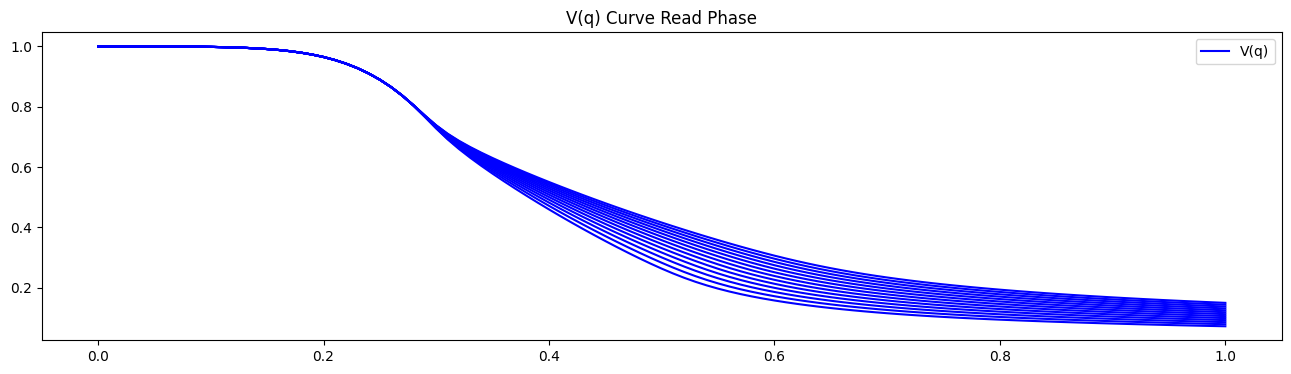

In [6]:
steps, vsweep_standard_read, v_q_standard_read, v_q_neg_standard_read, standard_read_log = __init_model__(
    operation_type=OperationType.READ,
    circuit_type=CircuitType.STANDARD, 
    asc_file_path=os.path.join(ltspice, "standard/read/standard_read.asc"),
    schematic_image_path=os.path.join(schematics, "standard.png"),
    vdd=vdd_standard,
    vsweep=vsweep_standard,
    vwl=vwl_read,
    vbl=vbl_read,
    vblneg=vblneg_read,
    params=[rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard]
)

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Read Phase")
plt.legend(["V(q)"])
save_image(image_path=os.path.join(images, "standard_read_simulation.png"), plt=plt)
plt.show()

w_ax_standard_read = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]


Text(0.5, 1.0, 'W AX Trend Read Phase')

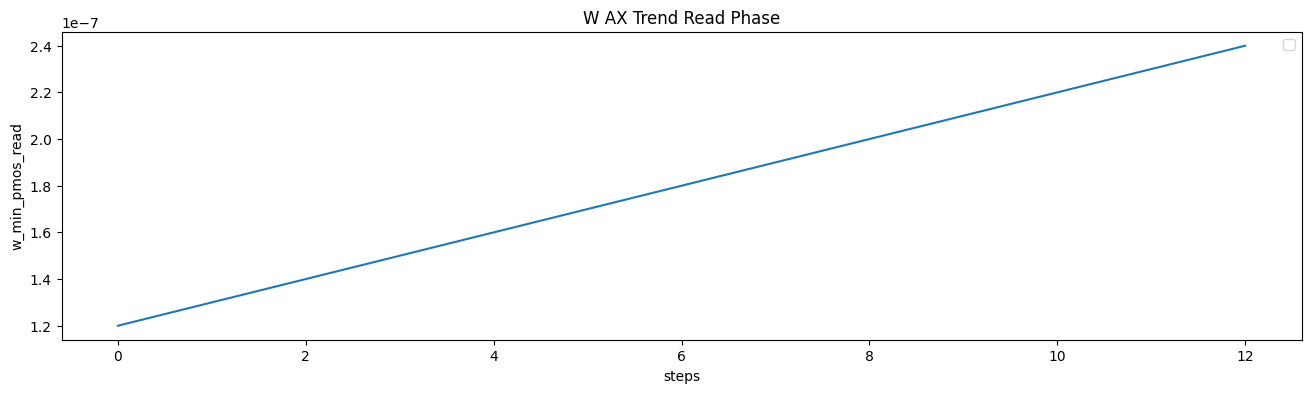

In [7]:
standard_read_log_file_path = f"./{standard_read_log}"

with open(standard_read_log_file_path, "r") as file:
    content = file.read()

w_ax_standard_read = get_data(pattern=w_ax_standard_pattern, content=content)
print(f'w_ax_standard_read = {w_ax_standard_read}')

plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_read'])
plt.plot(w_ax_standard_read, label='w_ax_standard_read')
plt.ylabel('w_min_pmos_read'); plt.xlabel('steps'); plt.title('W AX Trend Read Phase')

snm_standard_read[w_ax_pos=1.3e-07 u] = 141.84301463106343
File updated successfully: ../../images/butterfly_curve_standard_read.png


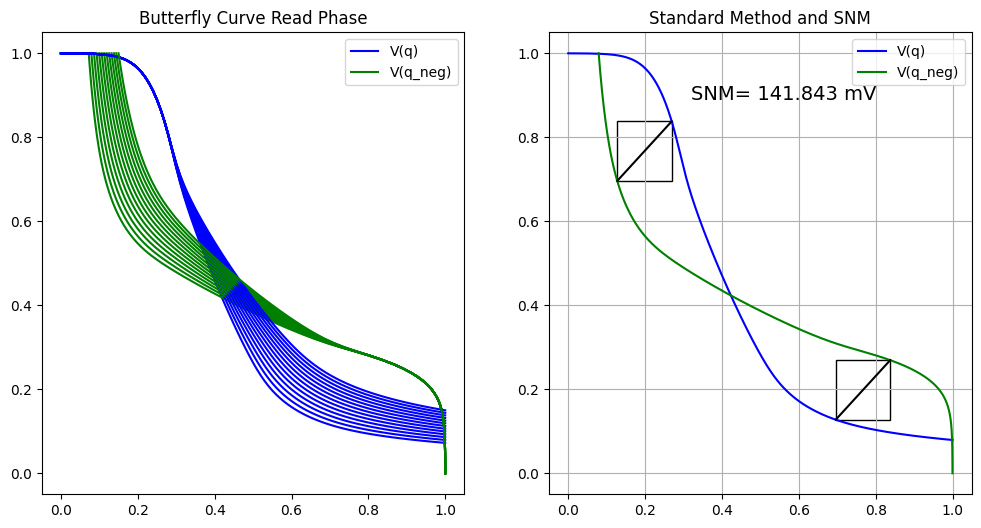

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_read = []
vq_standard_read = []
x_vqneg_standard_read = []
vqneg_standard_read = []
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    x_vq_standard_read.append(x)
    vq_standard_read.append(vq)
    x_vqneg_standard_read.append(vq)
    vqneg_standard_read.append(x)
    axs[0].plot(vsweep_standard_read.get_wave(step), v_q_standard_read.get_wave(step), label=steps[step], color='blue')
    axs[0].plot(v_q_standard_read.get_wave(step), vsweep_standard_read.get_wave(step), label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Read Phase")
axs[0].legend(["V(q)", "V(q_neg)"])


# graphical-processing
snm_standard_read = graphical_processing(
    x_vq=x_vq_standard_read[w_ax_pos], 
    vq=vq_standard_read[w_ax_pos], 
    x_vqneg=x_vqneg_standard_read[w_ax_pos], 
    vqneg=vqneg_standard_read[w_ax_pos], 
    ax=axs[1]
)
print(f'snm_standard_read[w_ax_pos={w_ax_standard_read[w_ax_pos]} u] = {snm_standard_read}')

save_image(image_path=os.path.join(images, "butterfly_curve_standard_read.png"), plt=plt)
plt.show()

<h2>SNM Seevinck Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/hold/seevinck_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\seevinck\hold\seevinck_hold_1.raw, Log file: data\seevinck\hold\seevinck_hold_1.log
File opened successfully: data\seevinck\hold\seevinck_hold_1.raw
File updated successfully: ../../images/seevinck_hold_simulation.png


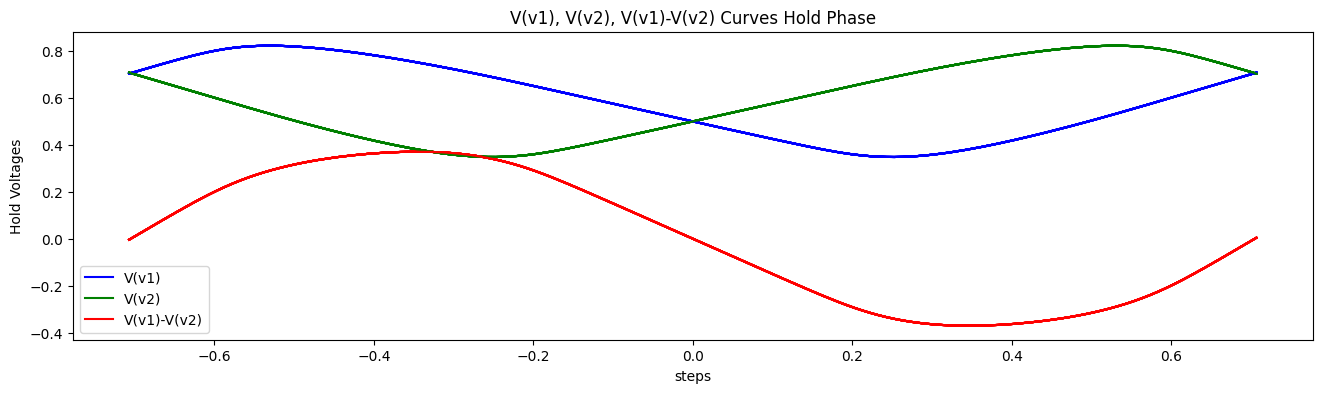

w_ax                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
1.2e-07 u                      261.875 mV                     -261.859 mV                   
1.3e-07 u                      261.875 mV                     -261.859 mV                   
1.4e-07 u                      261.875 mV                     -261.859 mV                   
1.5e-07 u                      261.875 mV                     -261.859 mV                   
1.6e-07 u                      261.875 mV                     -261.859 mV                   
1.7e-07 u                      261.875 mV                     -261.859 mV                   
1.8e-07 u                      261.875 mV                     -261.859 mV                   
1.9e-07 u                      261.875 mV                     -261.858 mV                   
2e-07 u                        261.875 mV                     -261.858 mV                   
2.1e-07 u                      261.874 mV                     -261.858

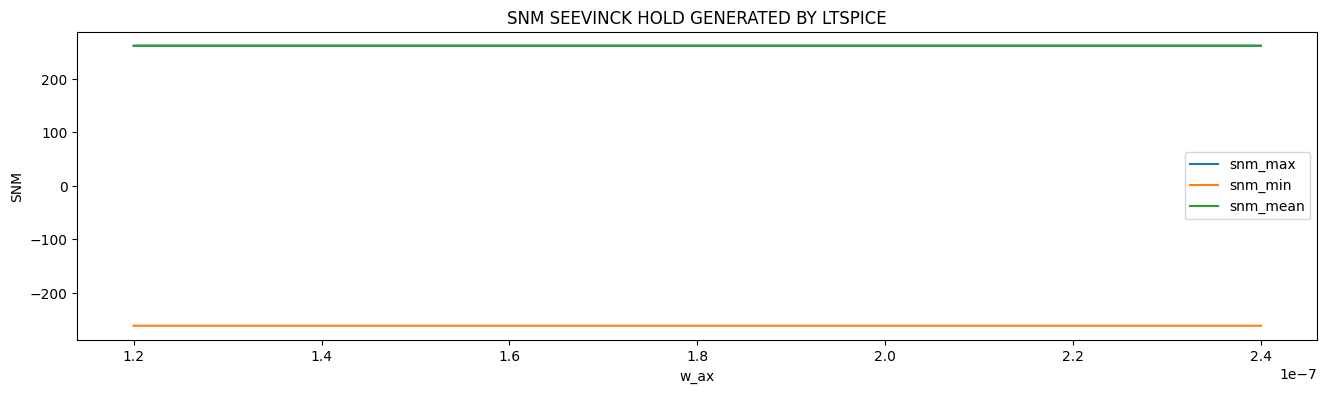

In [11]:
steps, vsweep_seevinck_hold, v_1_seevinck_hold, v_2_seevinck_hold, seevinck_hold_log = __init_model__(
    operation_type=OperationType.HOLD,
    circuit_type=CircuitType.SEEVINCK, 
    asc_file_path=os.path.join(ltspice, "seevinck/hold/seevinck_hold.asc"),
    schematic_image_path=os.path.join(schematics, "seevinck.png"),
    vdd=vdd_seevinck,
    vsweep=vsweep_seevinck,
    vwl=vwl_hold,
    vbl=vbl_hold,
    vblneg=vblneg_hold,
    params=[rit_models, dc_vsweep_seevinck, snm_max(0.707), snm_min(0.707), w_ax_step_param_seevinck, save_w_ax_seevinck]
)

plt.figure(figsize=(16, 4))
vq_seevinck_hold = []
vqneg_seevinck_hold = []
vq_vqneg_seevinck_hold = []
x_seevinck_hold = []
for step in range(len(steps)):
    vq = v_1_seevinck_hold.get_wave(step)
    vqneg = v_2_seevinck_hold.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_hold.append(vq)
    vqneg_seevinck_hold.append(vqneg)
    vq_vqneg_seevinck_hold.append(vq_minus_vqneg)
    x = vsweep_seevinck_hold.get_wave(step)
    x_seevinck_hold.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
save_image(image_path=os.path.join(images, "seevinck_hold_simulation.png"), plt=plt)
plt.show()


seevinck_hold_log_file_path = f"./{seevinck_hold_log}"
with open(seevinck_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_hold = get_data(pattern=w_ax_seevinck_pattern,  content=content)

snm_max_seevinck_hold = get_data(pattern=snm_max_seevinck_pattern, content=content)
snm_max_seevinck_hold = [1000 * value for value in snm_max_seevinck_hold]

snm_min_seevinck_hold = get_data(pattern=snm_min_seevinck_pattern, content=content)
snm_min_seevinck_hold = [1000 * value for value in snm_min_seevinck_hold]

print("{:<30} {:<30} {:<30}".format("w_ax", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
snm_mean_seevinck_hold = []
for w, smax, smin in zip(w_ax_seevinck_hold, snm_max_seevinck_hold, snm_min_seevinck_hold):
    smean = (smax + abs(smin)) / 2
    print("{:<30} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_seevinck_hold.append(smean)
print(f'snm_seevinck_hold[{w_ax_seevinck_hold[w_ax_pos]} u] = {snm_max_seevinck_hold[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_hold, snm_max_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_min_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_mean_seevinck_hold)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK HOLD GENERATED BY LTSPICE")
save_image(image_path=os.path.join(images, "snm_seevinck_hold_generated_by_ltspice.png"), plt=plt)
plt.show()

snm_seevinck_hold_seevinck_processing = 261.9149308688862
snm_seevinck_hold_standard_processing = 261.9878941702367
File updated successfully: ../../images/v1_minus_v2_seevinck_hold.png


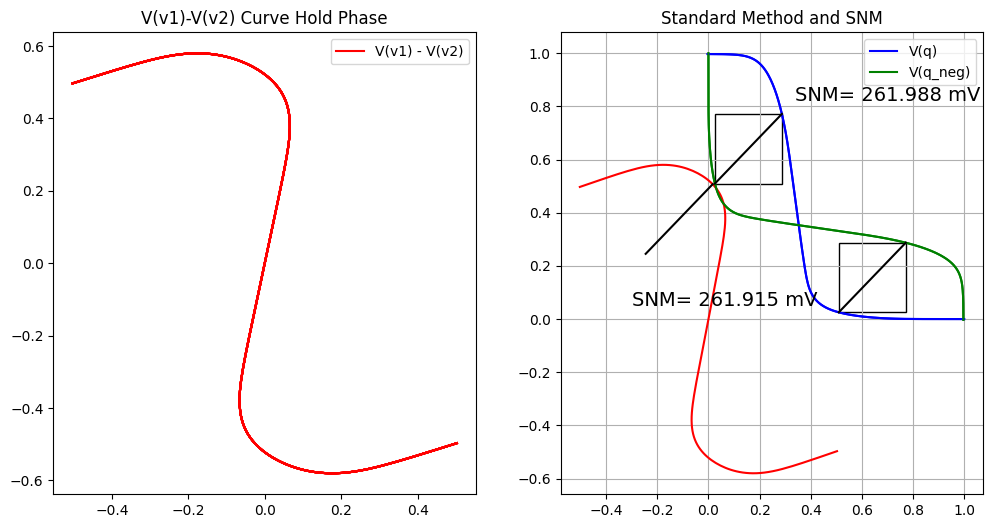

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_hold, vqneg_seevinck_hold):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vq_vqneg_array, angle_degrees=-45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Hold Phase")
axs[0].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vq_seevinck_hold[w_ax_pos], angle_degrees=-45)
xshold2, yshold2 = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vqneg_seevinck_hold[w_ax_pos], angle_degrees=-45)
axs[1].plot(xshold1, yshold1, color='blue')
axs[1].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_hold_seevinck_processing = seevinck_processing(
    x_v1_minus_v2=x_seevinck_hold[w_ax_pos], 
    v1_minus_v2=vq_vqneg_seevinck_hold[w_ax_pos], 
    ax=axs[1]
)
axs[1].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
print(f'snm_seevinck_hold_seevinck_processing = {snm_seevinck_hold_seevinck_processing}')

# graphical-processing
snm_seevinck_hold_standard_processing = graphical_processing(
    x_vq=xshold1, 
    vq=yshold1, 
    x_vqneg=xshold2, 
    vqneg=yshold2, 
    ax=axs[1]
)
axs[1].grid()
print(f'snm_seevinck_hold_standard_processing = {snm_seevinck_hold_standard_processing}')

save_image(image_path=os.path.join(images, "v1_minus_v2_seevinck_hold.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/read/seevinck_read.asc
Successful/Total Simulations: 0/1
Raw file: data\seevinck\read\seevinck_read_1.raw, Log file: data\seevinck\read\seevinck_read_1.log
File opened successfully: data\seevinck\read\seevinck_read_1.raw
File updated successfully: ../../images/seevinck_read_simulation.png


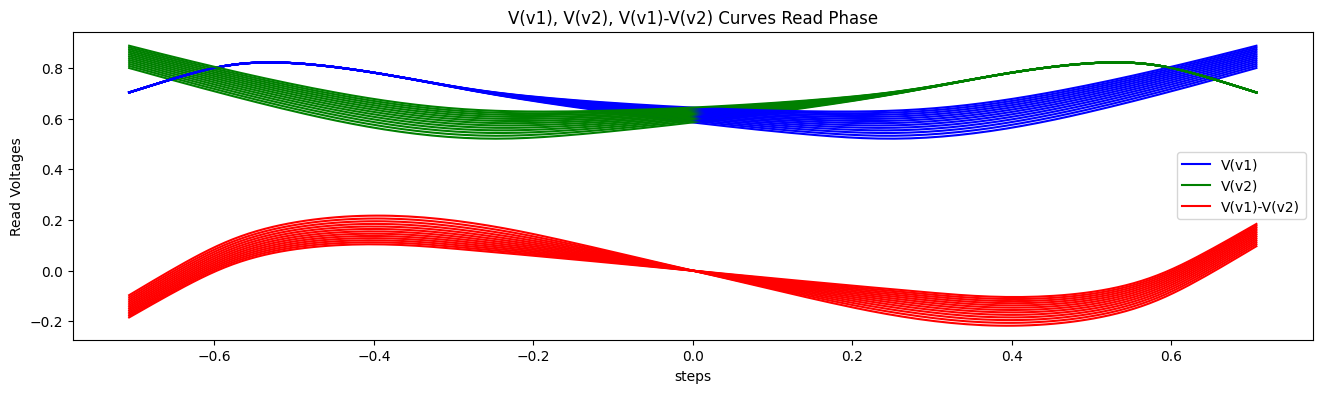

w_ax                 SNM_MAX(READ)                  SNM_MIN(READ)                 
1.2e-07 u            153.49699999999999 mV          -153.499 mV                   
1.3e-07 u            145.509 mV                     -145.491 mV                   
1.4e-07 u            137.816 mV                     -137.78199999999998 mV        
1.5e-07 u            130.39600000000002 mV          -130.373 mV                   
1.6e-07 u            123.232 mV                     -123.226 mV                   
1.7e-07 u            116.30699999999999 mV          -116.31700000000001 mV        
1.8e-07 u            109.608 mV                     -109.63000000000001 mV        
1.9e-07 u            106.27000000000001 mV          -106.27000000000001 mV        
2e-07 u              111.278 mV                     -111.278 mV                   
2.1e-07 u            116.19 mV                      -116.19 mV                    
2.2e-07 u            121.009 mV                     -121.009 mV                   
2.3e

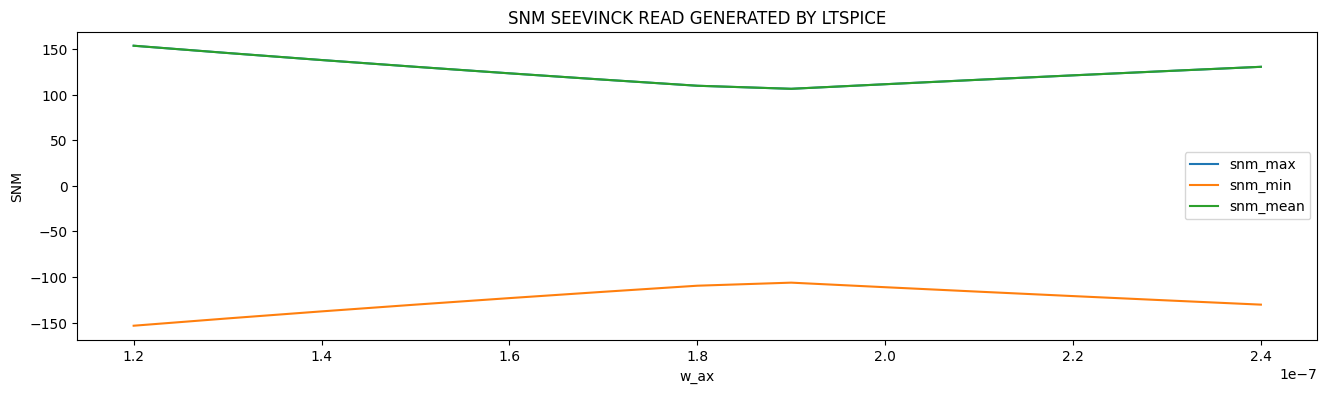

In [14]:
steps, vsweep_seevinck_read, v_1_seevinck_read, v_2_seevinck_read, seevinck_read_log = __init_model__(
    operation_type=OperationType.READ,
    circuit_type=CircuitType.SEEVINCK, 
    asc_file_path=os.path.join(ltspice, "seevinck/read/seevinck_read.asc"),
    schematic_image_path=os.path.join(schematics, "seevinck.png"),
    vdd=vdd_seevinck,
    vsweep=vsweep_seevinck,
    vwl=vwl_read,
    vbl=vbl_read,
    vblneg=vblneg_read,
    params=[rit_models, dc_vsweep_seevinck, snm_max(0.707), snm_min(0.707), w_ax_step_param_seevinck, save_w_ax_seevinck]
)

plt.figure(figsize=(16, 4))
vq_seevinck_read = []
vqneg_seevinck_read = []
vq_vqneg_seevinck_read = []
x_seevinck_read = []
for step in range(len(steps)):
    vq = v_1_seevinck_read.get_wave(step)
    vqneg = v_2_seevinck_read.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_read.append(vq)
    vqneg_seevinck_read.append(vqneg)
    vq_vqneg_seevinck_read.append(vq_minus_vqneg)
    x = vsweep_seevinck_read.get_wave(step)
    x_seevinck_read.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
save_image(image_path=os.path.join(images, "seevinck_read_simulation.png"), plt=plt)
plt.show()


seevinck_read_log_file_path = f"./{seevinck_read_log}"
with open(seevinck_read_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_read = get_data(pattern=w_ax_seevinck_pattern, content=content)

snm_max_seevinck_read = get_data(pattern=snm_max_seevinck_pattern, content=content)
snm_max_seevinck_read = [1000 * value for value in snm_max_seevinck_read]

snm_min_seevinck_read = get_data(pattern=snm_min_seevinck_pattern, content=content)
snm_min_seevinck_read = [1000 * value for value in snm_min_seevinck_read]

print("{:<20} {:<30} {:<30}".format("w_ax", "SNM_MAX(READ)", "SNM_MIN(READ)"))
snm_mean_seevinck_read = []
for w, smax, smin in zip(w_ax_seevinck_read, snm_max_seevinck_read, snm_min_seevinck_read):
    smean = (smax + abs(smin)) / 2
    print("{:<20} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_seevinck_read.append(smean)
print(f'snm_seevinck_read[{w_ax_seevinck_read[w_ax_pos]} u] = {snm_max_seevinck_read[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_read, snm_max_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_min_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_mean_seevinck_read)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK READ GENERATED BY LTSPICE")
save_image(image_path=os.path.join(images, "snm_seevinck_read_generated_by_ltspice.png"), plt=plt)
plt.show()

snm_seevinck_read_seevinck_processing = 145.53129774047963
snm_seevinck_read_standard_processing = 145.6016039856352
File updated successfully: ../../images/v1_minus_v2_seevinck_read.png


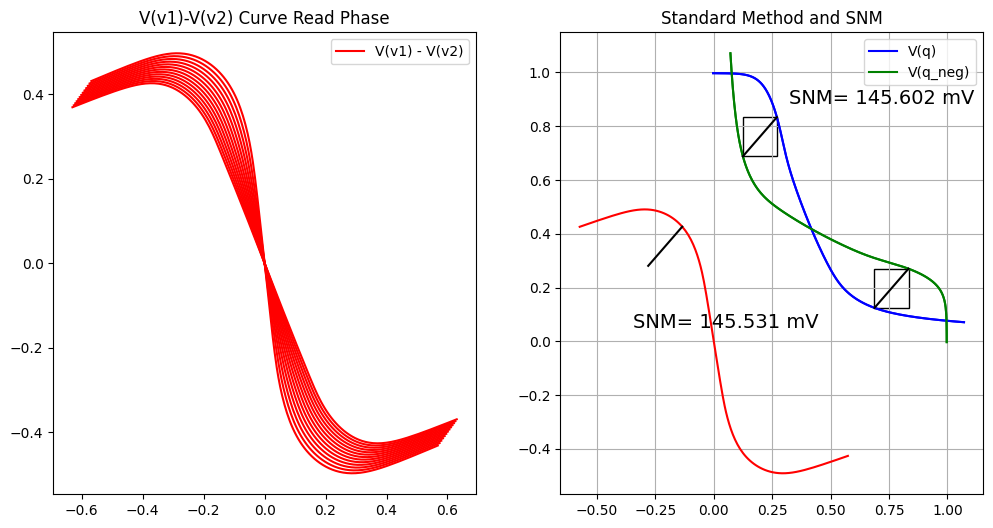

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_read, vqneg_seevinck_read):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x=x_seevinck_read[w_ax_pos], y=vq_vqneg_array, angle_degrees=-45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Read Phase")
axs[0].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x=x_seevinck_read[w_ax_pos], y=vq_seevinck_read[w_ax_pos], angle_degrees=-45)
xshold2, yshold2 = rotate_points(x=x_seevinck_read[w_ax_pos], y=vqneg_seevinck_read[w_ax_pos], angle_degrees=-45)
axs[1].plot(xshold1, yshold1, color='blue')
axs[1].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_read_seevinck_processing = seevinck_processing(
    x_v1_minus_v2=x_seevinck_read[w_ax_pos], 
    v1_minus_v2=vq_vqneg_seevinck_read[w_ax_pos], 
    ax=axs[1]
)
axs[1].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
print(f'snm_seevinck_read_seevinck_processing = {snm_seevinck_read_seevinck_processing}')

# graphical-processing
snm_seevinck_read_standard_processing = graphical_processing(
    x_vq=xshold1, 
    vq=yshold1, 
    x_vqneg=xshold2, 
    vqneg=yshold2, 
    ax=axs[1]
)
axs[1].grid()
print(f'snm_seevinck_read_standard_processing = {snm_seevinck_read_standard_processing}')

save_image(image_path=os.path.join(images, "v1_minus_v2_seevinck_read.png"), plt=plt)
plt.show()

<h2>Gaussian VTH DC Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

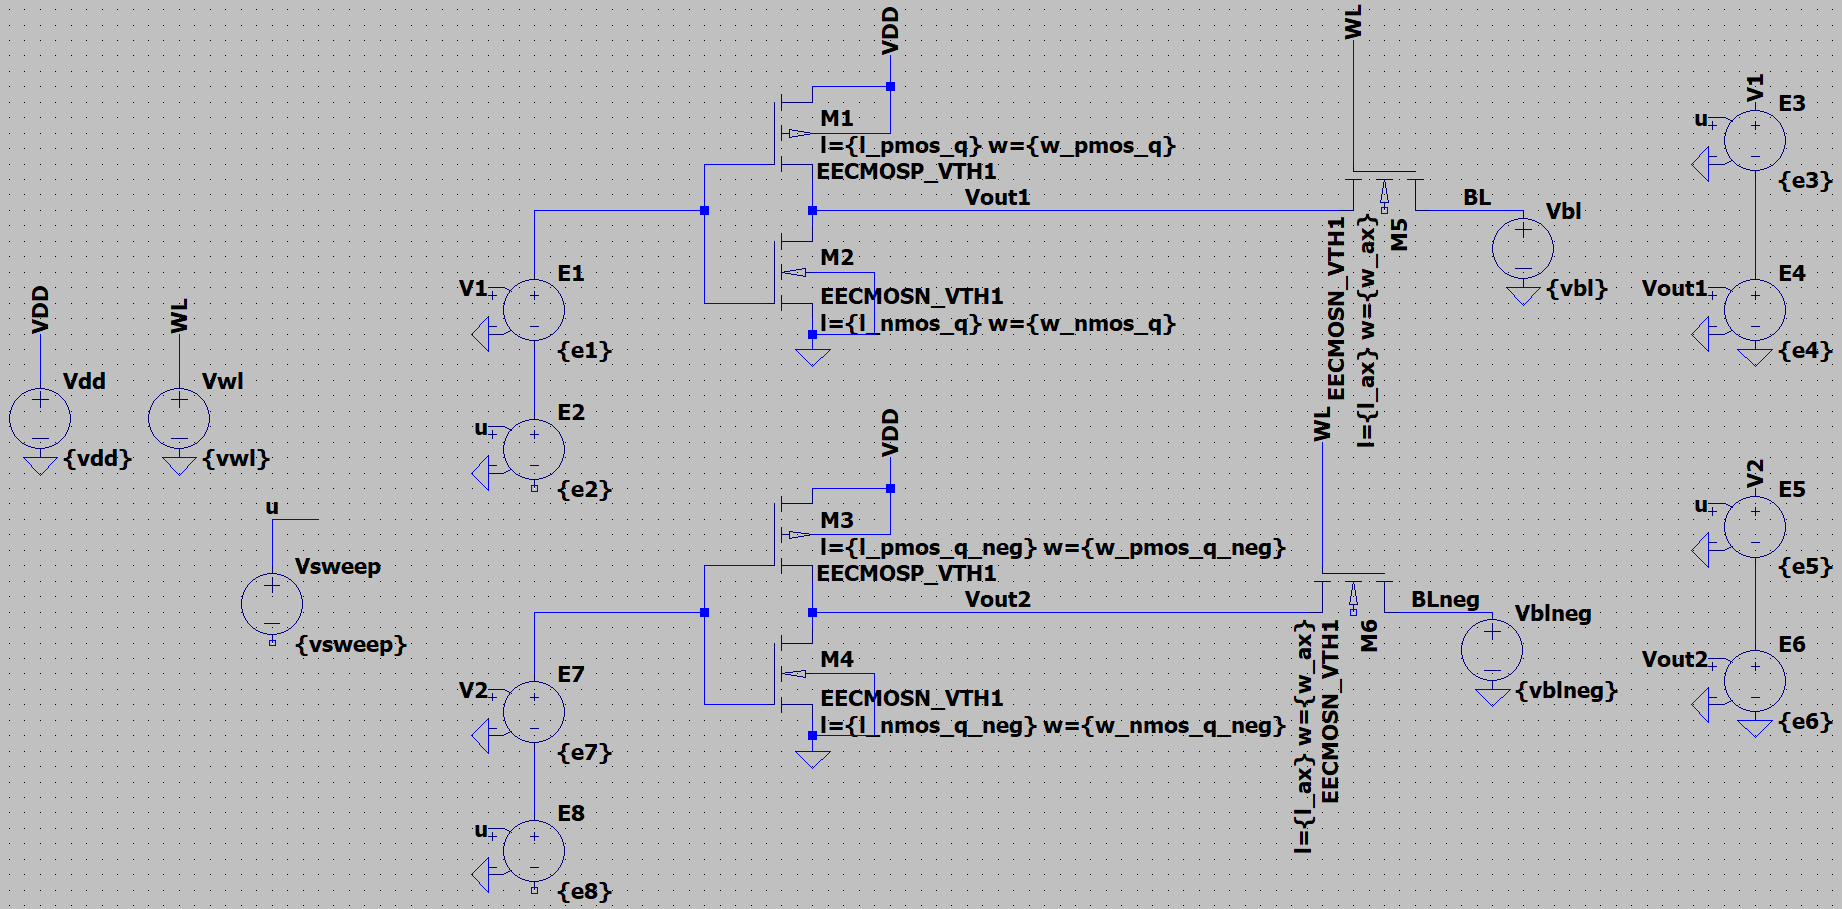

File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw


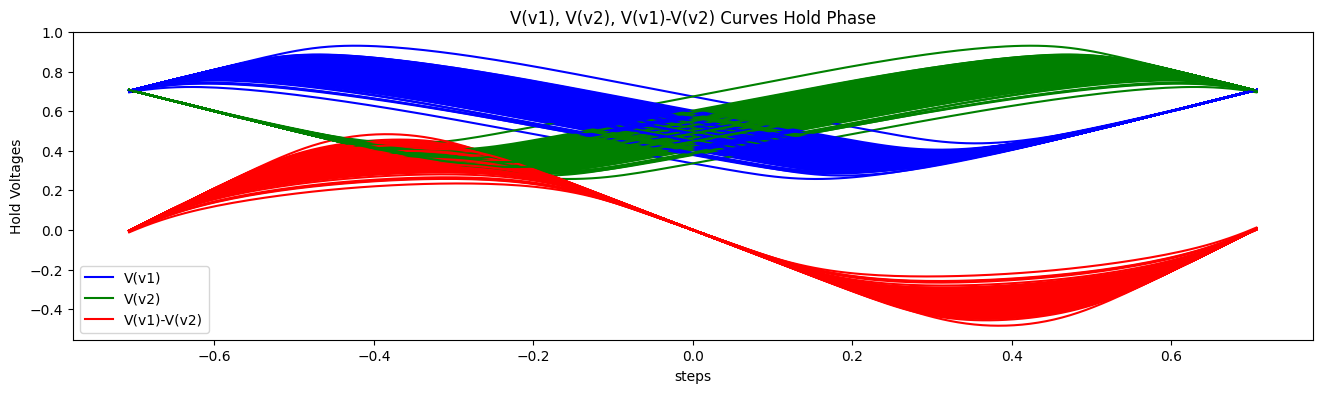

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         243.042 mV                     -243.037 mV                   
<class 'ValueError'> u         275.92100000000005 mV          -275.92 mV                    
<class 'ValueError'> u         263.92199999999997 mV          -263.94800000000004 mV        
<class 'ValueError'> u         255.892 mV                     -255.905 mV                   
<class 'ValueError'> u         322.741 mV                     -322.66299999999995 mV        
<class 'ValueError'> u         273.245 mV                     -273.254 mV                   
<class 'ValueError'> u         265.31300000000005 mV          -265.30199999999996 mV        
<class 'ValueError'> u         211.347 mV                     -211.37 mV                    
<class 'ValueError'> u         232.078 mV                     -232.11100000000002 mV        
<class 'ValueError'> u         252.986 mV                     -253.000

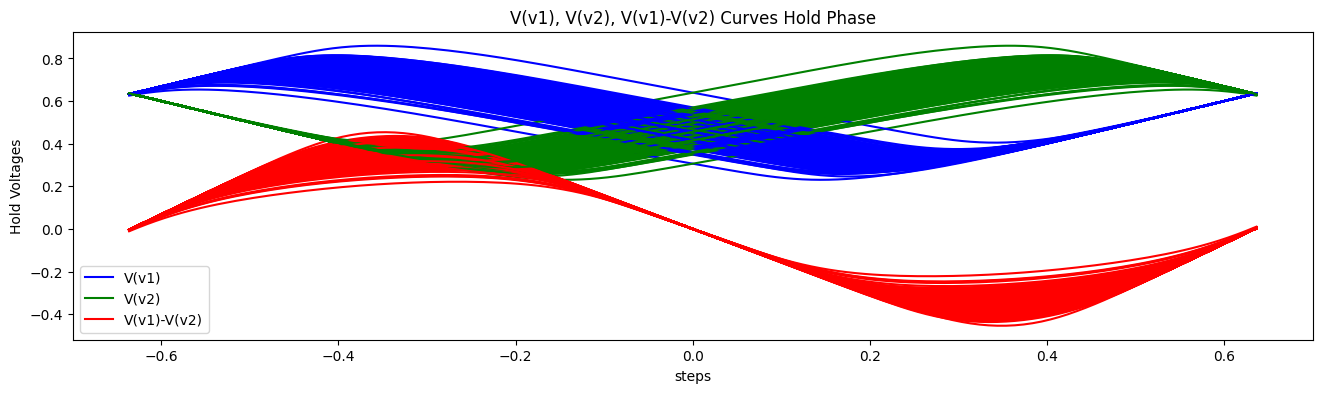

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         231.804 mV                     -231.763 mV                   
<class 'ValueError'> u         265.078 mV                     -265.04100000000005 mV        
<class 'ValueError'> u         252.83499999999998 mV          -252.83499999999998 mV        
<class 'ValueError'> u         246.03900000000002 mV          -246.047 mV                   
<class 'ValueError'> u         308.665 mV                     -308.665 mV                   
<class 'ValueError'> u         262.67 mV                      -262.683 mV                   
<class 'ValueError'> u         255.11800000000002 mV          -255.09799999999998 mV        
<class 'ValueError'> u         202.389 mV                     -202.405 mV                   
<class 'ValueError'> u         222.776 mV                     -222.798 mV                   
<class 'ValueError'> u         243.03 mV                      -243.06 

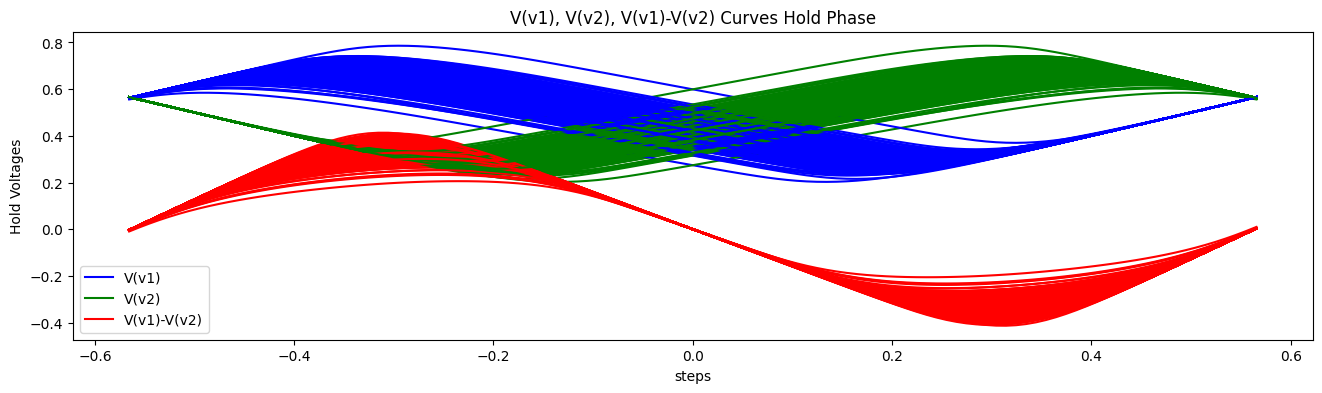

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         216.731 mV                     -216.732 mV                   
<class 'ValueError'> u         251.469 mV                     -251.451 mV                   
<class 'ValueError'> u         238.317 mV                     -238.298 mV                   
<class 'ValueError'> u         234.163 mV                     -234.17499999999998 mV        
<class 'ValueError'> u         289.921 mV                     -289.965 mV                   
<class 'ValueError'> u         249.808 mV                     -249.82999999999998 mV        
<class 'ValueError'> u         242.822 mV                     -242.794 mV                   
<class 'ValueError'> u         191.81799999999998 mV          -191.82399999999998 mV        
<class 'ValueError'> u         211.664 mV                     -211.679 mV                   
<class 'ValueError'> u         230.893 mV                     -230.87 

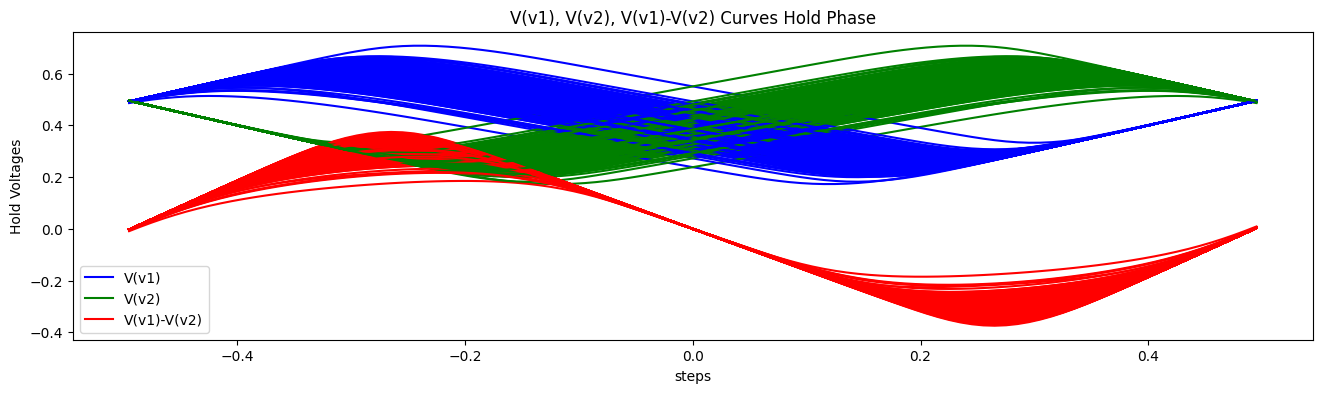

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         194.639 mV                     -194.64000000000001 mV        
<class 'ValueError'> u         232.92399999999998 mV          -232.91500000000002 mV        
<class 'ValueError'> u         217.333 mV                     -217.32399999999998 mV        
<class 'ValueError'> u         218.85 mV                      -218.84 mV                    
<class 'ValueError'> u         264.757 mV                     -264.762 mV                   
<class 'ValueError'> u         233.323 mV                     -233.33200000000002 mV        
<class 'ValueError'> u         227.12199999999999 mV          -227.12099999999998 mV        
<class 'ValueError'> u         178.404 mV                     -178.4 mV                     
<class 'ValueError'> u         197.36 mV                      -197.353 mV                   
<class 'ValueError'> u         214.884 mV                     -214.885

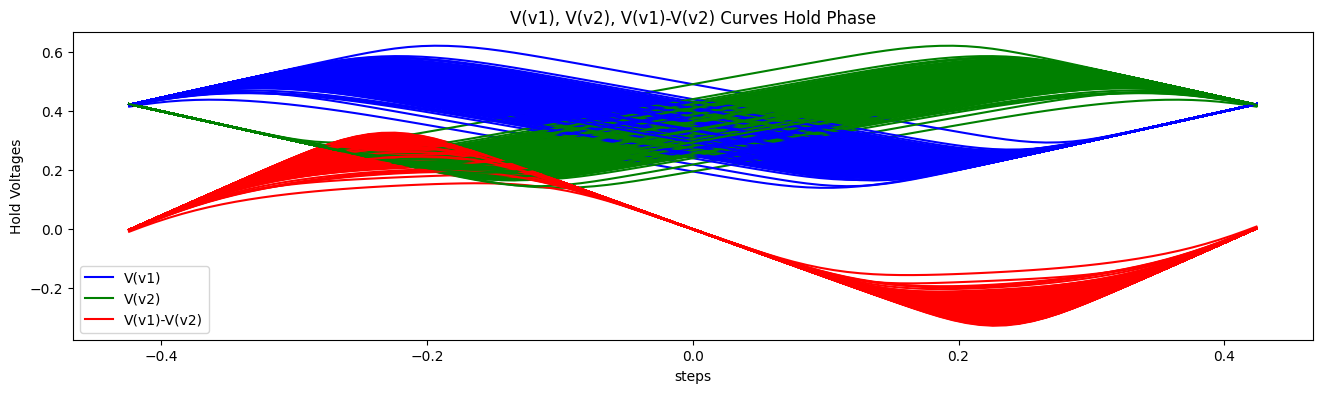

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         163.169 mV                     -163.21099999999998 mV        
<class 'ValueError'> u         206.484 mV                     -206.55599999999998 mV        
<class 'ValueError'> u         186.919 mV                     -186.94 mV                    
<class 'ValueError'> u         197.84099999999998 mV          -197.876 mV                   
<class 'ValueError'> u         231.399 mV                     -231.52100000000002 mV        
<class 'ValueError'> u         211.483 mV                     -211.46599999999998 mV        
<class 'ValueError'> u         205.66799999999998 mV          -205.563 mV                   
<class 'ValueError'> u         159.612 mV                     -159.658 mV                   
<class 'ValueError'> u         177.35 mV                      -177.374 mV                   
<class 'ValueError'> u         191.932 mV                     -191.875

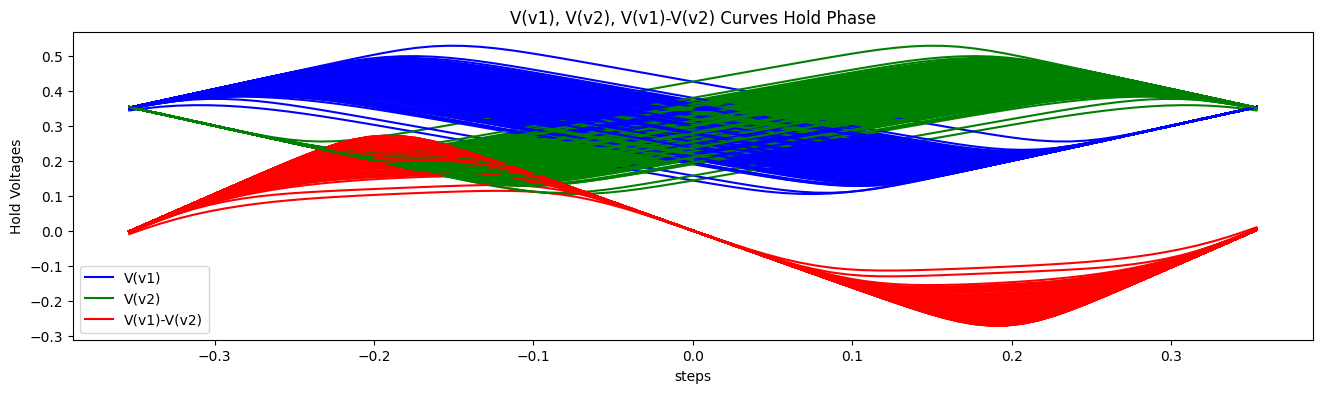

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         124.274 mV                     -124.35799999999999 mV        
<class 'ValueError'> u         171.34 mV                      -171.19699999999997 mV        
<class 'ValueError'> u         148.364 mV                     -148.459 mV                   
<class 'ValueError'> u         168.291 mV                     -168.117 mV                   
<class 'ValueError'> u         192.109 mV                     -192.008 mV                   
<class 'ValueError'> u         181.75 mV                      -182.004 mV                   
<class 'ValueError'> u         176.429 mV                     -176.44299999999998 mV        
<class 'ValueError'> u         132.217 mV                     -132.16400000000002 mV        
<class 'ValueError'> u         148.291 mV                     -148.18 mV                    
<class 'ValueError'> u         159.60399999999998 mV          -159.686

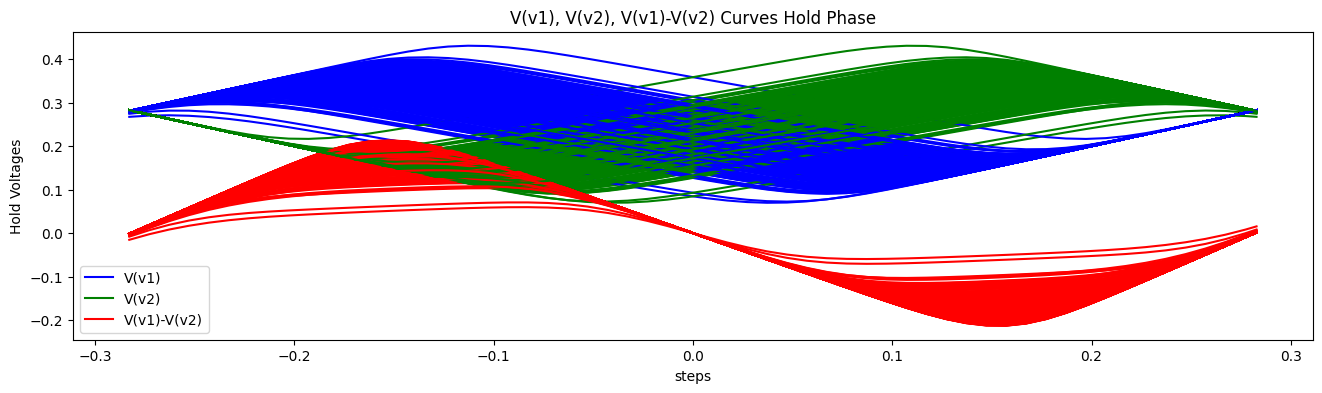

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         82.183 mV                      -82.14580000000001 mV         
<class 'ValueError'> u         130.631 mV                     -130.683 mV                   
<class 'ValueError'> u         106.53 mV                      -106.52799999999999 mV        
<class 'ValueError'> u         130.709 mV                     -130.762 mV                   
<class 'ValueError'> u         149.85999999999999 mV          -149.46400000000003 mV        
<class 'ValueError'> u         145.321 mV                     -145.084 mV                   
<class 'ValueError'> u         139.299 mV                     -139.44899999999998 mV        
<class 'ValueError'> u         95.5783 mV                     -95.5842 mV                   
<class 'ValueError'> u         110.587 mV                     -110.58999999999999 mV        
<class 'ValueError'> u         120.20400000000001 mV          -120.167

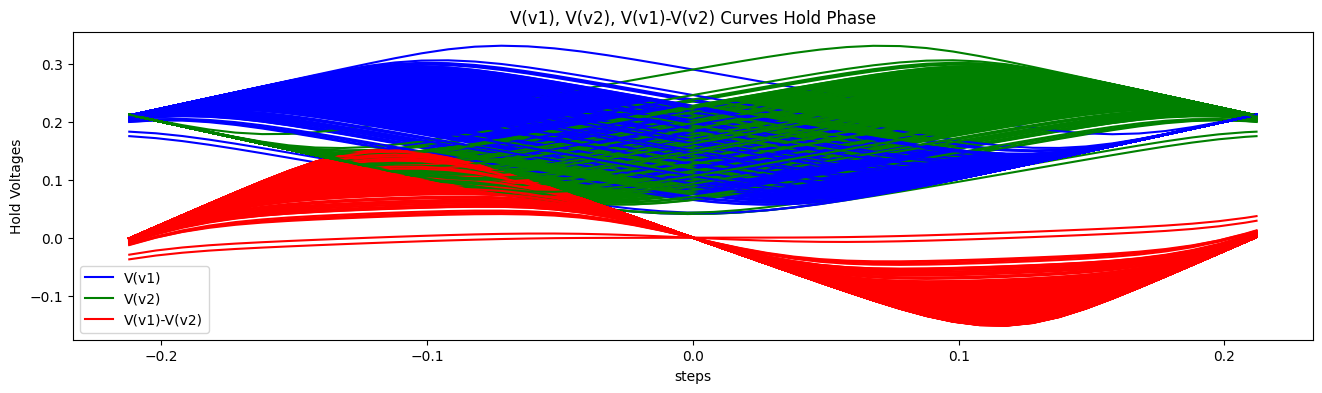

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         37.7165 mV                     -37.7691 mV                   
<class 'ValueError'> u         87.675 mV                      -87.81509999999999 mV         
<class 'ValueError'> u         62.897800000000004 mV          -62.837900000000005 mV        
<class 'ValueError'> u         88.94829999999999 mV           -89.0512 mV                   
<class 'ValueError'> u         105.86099999999999 mV          -105.673 mV                   
<class 'ValueError'> u         104.033 mV                     -103.76299999999999 mV        
<class 'ValueError'> u         98.0819 mV                     -97.86970000000001 mV         
<class 'ValueError'> u         53.56699999999999 mV           -53.586099999999995 mV        
<class 'ValueError'> u         68.4773 mV                     -68.5384 mV                   
<class 'ValueError'> u         77.7288 mV                     -77.6256

In [20]:
from IPython.display import Image, display
schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
display(Image(schematic_image_path))

import numpy as np
for scaling in np.arange(1.0, 0.2, -0.1):
    steps, vsweep_gaussian_vth_hold, v_1_gaussian_vth_hold, v_2_gaussian_vth_hold, gaussian_vth_hold_log = __init_model__(
        operation_type=OperationType.HOLD,
        circuit_type=CircuitType.GAUSSIAN_VTH, 
        asc_file_path=os.path.join(ltspice, "gaussian-vth/hold/gaussian_vth_hold.asc"),
        schematic_image_path=os.path.join(schematics, "gaussian_vth.png"),
        vdd=f'{float(vdd_gaussian_vth) * scaling}',
        vsweep=vsweep_gaussian_vth,
        vwl=vwl_hold,
        vbl=vbl_hold,
        vblneg=vblneg_hold,
        params=[rit_models_montecarlo, dc_vsweep_gaussian_vth(-0.707*scaling, 0.707*scaling, 0.01), step_param_run_gaussian_vth, snm_max(0.707), snm_min(0.707)]
    )
    
    plt.figure(figsize=(16, 4))
    vq_gaussian_vth_hold = []
    vqneg_gaussian_vth_hold = []
    vq_vqneg_gaussian_vth_hold = []
    x_gaussian_vth_hold = []
    for step in range(len(steps)):
        vq = v_1_gaussian_vth_hold.get_wave(step)
        vq_gaussian_vth_hold.append(vq)
        vqneg = v_2_gaussian_vth_hold.get_wave(step)
        vqneg_gaussian_vth_hold.append(vqneg)
        vq_minus_vqneg = vq - vqneg
        vq_vqneg_gaussian_vth_hold.append(vq_minus_vqneg)
        x = vsweep_gaussian_vth_hold.get_wave(step)
        x_gaussian_vth_hold.append(x)
        plt.plot(x, vq, label=steps[step], color='blue')
        plt.plot(x, vqneg, label=steps[step], color='green')
        plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
    plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
    plt.xlabel("steps"); plt.ylabel("Hold Voltages")
    plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
    #save_image(image_path=os.path.join(images, "gaussian_vth_hold_simulation.png"), plt=plt)
    plt.show()
    gaussian_vth_hold_log_file_path = f"./{gaussian_vth_hold_log}"
    with open(gaussian_vth_hold_log_file_path, "r") as file:
        content = file.read()
    
    snm_max_gaussian_vth_hold = get_data(pattern=snm_max_seevinck_pattern, content=content)
    snm_max_gaussian_vth_hold = [1000 * value for value in snm_max_gaussian_vth_hold]
     
    snm_min_gaussian_vth_hold = get_data(pattern=snm_min_seevinck_pattern, content=content)
    snm_min_gaussian_vth_hold = [1000 * value for value in snm_min_gaussian_vth_hold]
    
    print("{:<30} {:<30} {:<30}".format("V_TH", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
    snm_mean_gaussian_vth_hold = []
    v_th_hold_gaussian_vth = []
    for smax, smin in zip(snm_max_gaussian_vth_hold, snm_min_gaussian_vth_hold):
        smean = (smax + abs(smin)) / 2
        print("{:<30} {:<30} {:<30}".format(f'{ValueError} u', f'{smax} mV', f'{smin} mV'))
        snm_mean_gaussian_vth_hold.append(smean)
    print(f'snm_mean_gaussian_vth_hold = {mean(snm_max_gaussian_vth_hold)}')
    print(f'snm_stdev_gaussian_vth_hold = {stdev(snm_max_gaussian_vth_hold)}')

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         243.042 mV                     -243.037 mV                   
<class 'ValueError'> u         275.92100000000005 mV          -275.92 mV                    
<class 'ValueError'> u         263.92199999999997 mV          -263.94800000000004 mV        
<class 'ValueError'> u         255.892 mV                     -255.905 mV                   
<class 'ValueError'> u         322.741 mV                     -322.66299999999995 mV        
<class 'ValueError'> u         273.245 mV                     -273.254 mV                   
<class 'ValueError'> u         265.31300000000005 mV          -265.30199999999996 mV        
<class 'ValueError'> u         211.347 mV                     -211.37 mV                    
<class 'ValueError'> u         232.078 mV                     -232.11100000000002 mV        
<class 'ValueError'> u         252.986 mV                     -253.000

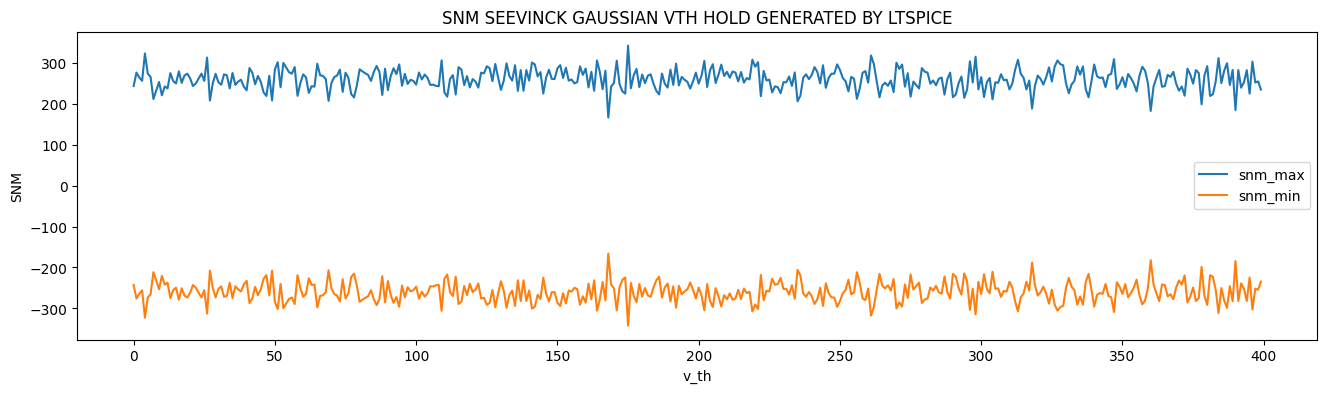

In [14]:
# gaussian_vth_hold_log_file_path = f"./{gaussian_vth_hold_log}"
# with open(gaussian_vth_hold_log_file_path, "r") as file:
#     content = file.read()
# 
# snm_max_gaussian_vth_hold = get_data(pattern=snm_max_seevinck_pattern, content=content)
# snm_max_gaussian_vth_hold = [1000 * value for value in snm_max_gaussian_vth_hold]
#  
# snm_min_gaussian_vth_hold = get_data(pattern=snm_min_seevinck_pattern, content=content)
# snm_min_gaussian_vth_hold = [1000 * value for value in snm_min_gaussian_vth_hold]
# 
# print("{:<30} {:<30} {:<30}".format("V_TH", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
# snm_mean_gaussian_vth_hold = []
# v_th_hold_gaussian_vth = []
# for smax, smin in zip(snm_max_gaussian_vth_hold, snm_min_gaussian_vth_hold):
#     smean = (smax + abs(smin)) / 2
#     print("{:<30} {:<30} {:<30}".format(f'{ValueError} u', f'{smax} mV', f'{smin} mV'))
#     snm_mean_gaussian_vth_hold.append(smean)

#plt.figure(figsize=(16, 4))
#plt.plot(snm_max_gaussian_vth_hold)
#plt.plot(snm_min_gaussian_vth_hold)
#plt.xlabel("v_th"); plt.ylabel("SNM")
#plt.legend(["snm_max","snm_min"])
#plt.title("SNM SEEVINCK GAUSSIAN VTH HOLD GENERATED BY LTSPICE")
#save_image(image_path=os.path.join(images, "snm_gaussian_vth_hold_generated_by_ltspice.png"), plt=plt)
#plt.show()

snm_mean_gaussian_vth_hold = 259.91638
snm_stdev_gaussian_vth_hold = 25.21061809848917
File updated successfully: ../../images/gaussian_vth_snm_hold.png


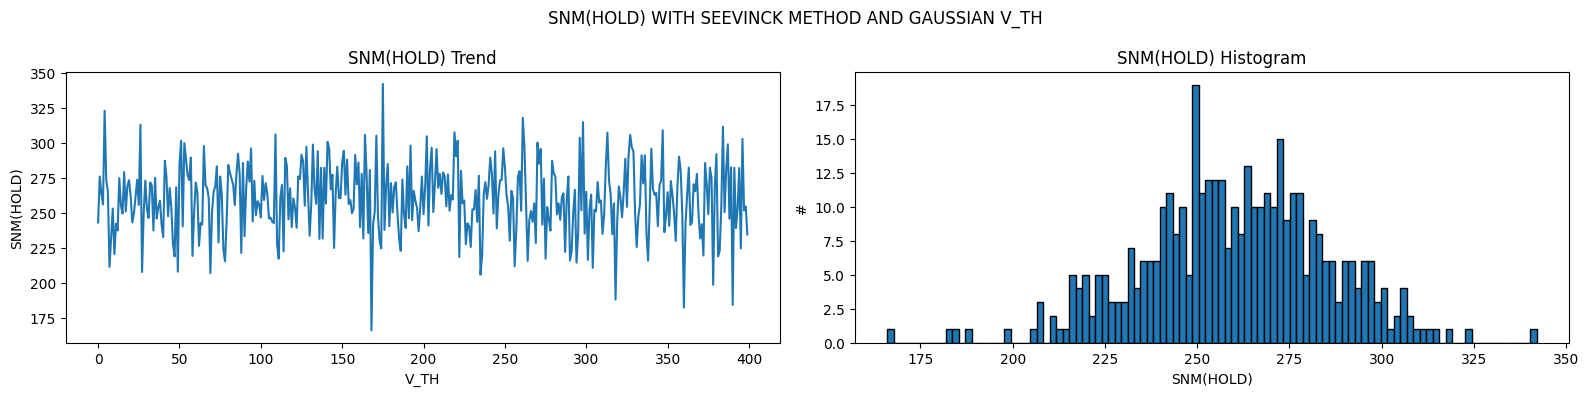

In [15]:
#fig, axs = plt.subplots(1, 2, figsize=(16, 4))
#plt.suptitle("SNM(HOLD) WITH SEEVINCK METHOD AND GAUSSIAN V_TH")
#axs[0].plot(snm_max_gaussian_vth_hold)
#axs[0].set_title("SNM(HOLD) Trend")
#axs[0].set_xlabel("V_TH"); axs[0].set_ylabel("SNM(HOLD)")
#axs[1].hist(snm_max_gaussian_vth_hold, bins=100, edgecolor='black')
#axs[1].set_xlabel("SNM(HOLD)"); axs[1].set_ylabel("#") 
#axs[1].set_title("SNM(HOLD) Histogram")
#plt.tight_layout()
#print(f'snm_mean_gaussian_vth_hold = {mean(snm_max_gaussian_vth_hold)}')
#print(f'snm_stdev_gaussian_vth_hold = {stdev(snm_max_gaussian_vth_hold)}')

#save_image(image_path=os.path.join(images, "gaussian_vth_snm_hold.png"), plt=plt)
#plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/gaussian-vth/read/gaussian_vth_read.asc


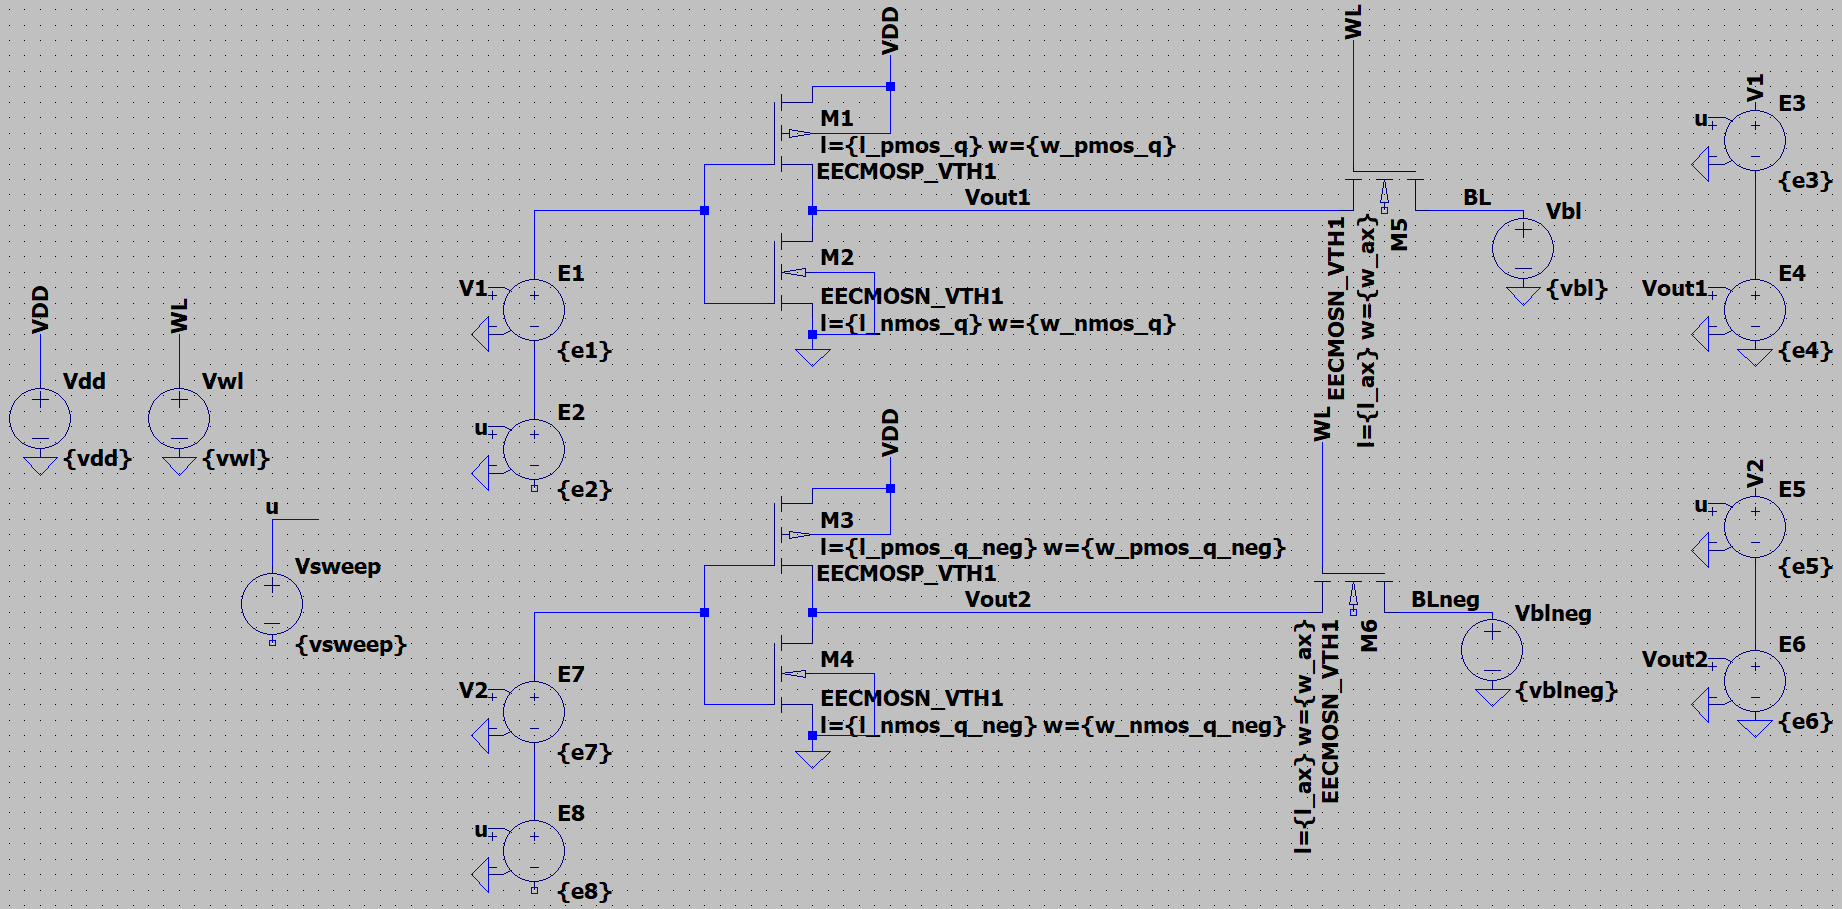

Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\read\gaussian_vth_read_1.raw, Log file: data\gaussian-vth\read\gaussian_vth_read_1.log
File opened successfully: data\gaussian-vth\read\gaussian_vth_read_1.raw
File updated successfully: ../../images/gaussian_vth_read_simulation.png


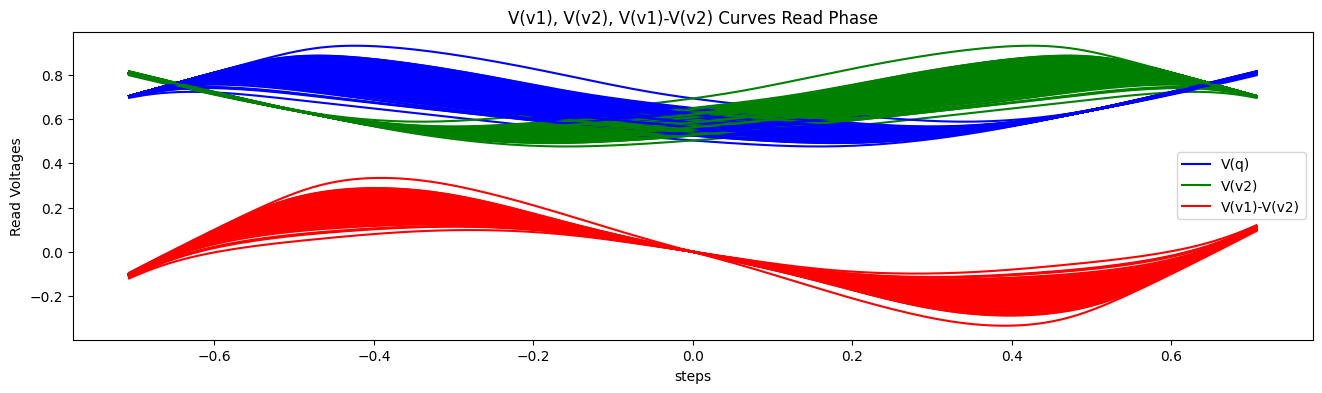

In [16]:
steps, vsweep_gaussian_vth_read, v_1_gaussian_vth_read, v_2_gaussian_vth_read, gaussian_vth_read_log = __init_model__(
    operation_type=OperationType.READ,
    circuit_type=CircuitType.GAUSSIAN_VTH, 
    asc_file_path=os.path.join(ltspice, "gaussian-vth/read/gaussian_vth_read.asc"),
    schematic_image_path=os.path.join(schematics, "gaussian_vth.png"),
    vdd=vdd_gaussian_vth,
    vsweep=vsweep_gaussian_vth,
    vwl=vwl_read,
    vbl=vbl_read,
    vblneg=vblneg_read,
    params=[rit_models_montecarlo, dc_vsweep_gaussian_vth, step_param_run_gaussian_vth, snm_max, snm_min]
)

plt.figure(figsize=(16, 4))
vq_gaussian_vth_read = []
vqneg_gaussian_vth_read = []
vq_vqneg_gaussian_vth_read = []
x_gaussian_vth_read = []
for step in range(len(steps)):
    vq = v_1_gaussian_vth_read.get_wave(step)
    vqneg = v_2_gaussian_vth_read.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_gaussian_vth_read.append(vq)
    vqneg_gaussian_vth_read.append(vqneg)
    vq_vqneg_gaussian_vth_read.append(vq_minus_vqneg)
    x = vsweep_gaussian_vth_read.get_wave(step)
    x_gaussian_vth_read.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(q)", "V(v2)", "V(v1)-V(v2)"])
save_image(image_path=os.path.join(images, "gaussian_vth_read_simulation.png"), plt=plt)
plt.show()

V_TH                           SNM_MAX(READ)                  SNM_MIN(READ)                 
<class 'ValueError'> u         119.31 mV                      -119.306 mV                   
<class 'ValueError'> u         157.64000000000001 mV          -157.59799999999998 mV        
<class 'ValueError'> u         141.936 mV                     -141.913 mV                   
<class 'ValueError'> u         140.071 mV                     -140.065 mV                   
<class 'ValueError'> u         203.557 mV                     -203.5 mV                     
<class 'ValueError'> u         160.209 mV                     -160.18099999999998 mV        
<class 'ValueError'> u         150.782 mV                     -150.76 mV                    
<class 'ValueError'> u         97.63900000000001 mV           -97.63040000000001 mV         
<class 'ValueError'> u         115.229 mV                     -115.24 mV                    
<class 'ValueError'> u         135.241 mV                     -135.241

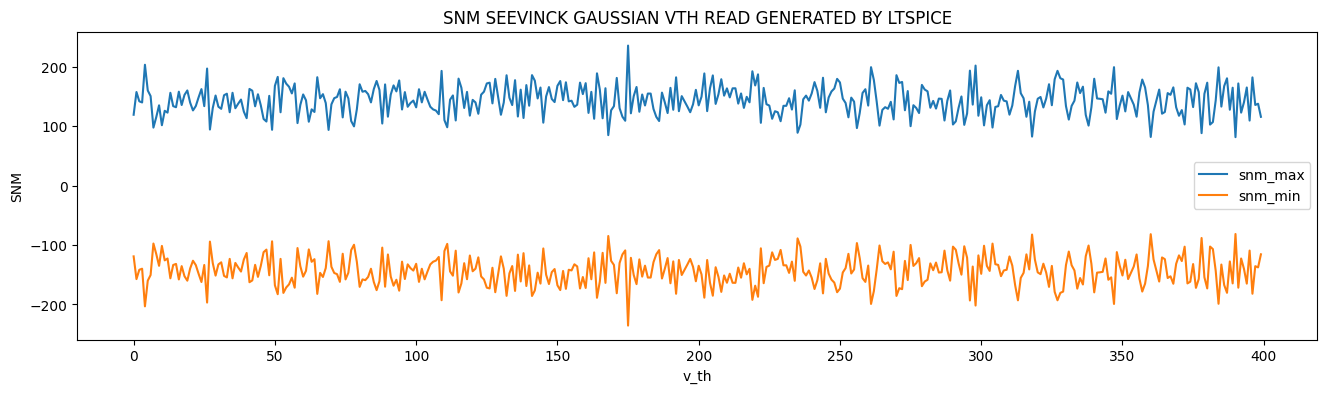

In [17]:
gaussian_vth_read_log_file_path = f"./{gaussian_vth_read_log}"
with open(gaussian_vth_read_log_file_path, "r") as file:
    content = file.read()

snm_max_gaussian_vth_read = get_data(pattern=snm_max_seevinck_pattern, content=content)
snm_max_gaussian_vth_read = [1000 * value for value in snm_max_gaussian_vth_read]

snm_min_gaussian_vth_read = get_data(pattern=snm_min_seevinck_pattern, content=content)
snm_min_gaussian_vth_read = [1000 * value for value in snm_min_gaussian_vth_read]

print("{:<30} {:<30} {:<30}".format("V_TH", "SNM_MAX(READ)", "SNM_MIN(READ)"))
snm_mean_gaussian_vth_read = []
v_th_read_gaussian_vth = []
for smax, smin in zip(snm_max_gaussian_vth_read, snm_min_gaussian_vth_read):
    smean = (smax + abs(smin)) / 2
    print("{:<30} {:<30} {:<30}".format(f'{ValueError} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_gaussian_vth_read.append(smean)

plt.figure(figsize=(16, 4))
plt.plot(snm_max_gaussian_vth_read)
plt.plot(snm_min_gaussian_vth_read)
plt.xlabel("v_th"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min"])
plt.title("SNM SEEVINCK GAUSSIAN VTH READ GENERATED BY LTSPICE")
save_image(image_path=os.path.join(images, "snm_gaussian_vth_read_generated_by_ltspice.png"), plt=plt)
plt.show()

snm_mean_gaussian_vth_read = 143.8688995
snm_stdev_gaussian_vth_read = 24.802555578987654
File updated successfully: ../../images/gaussian_vth_snm_read.png


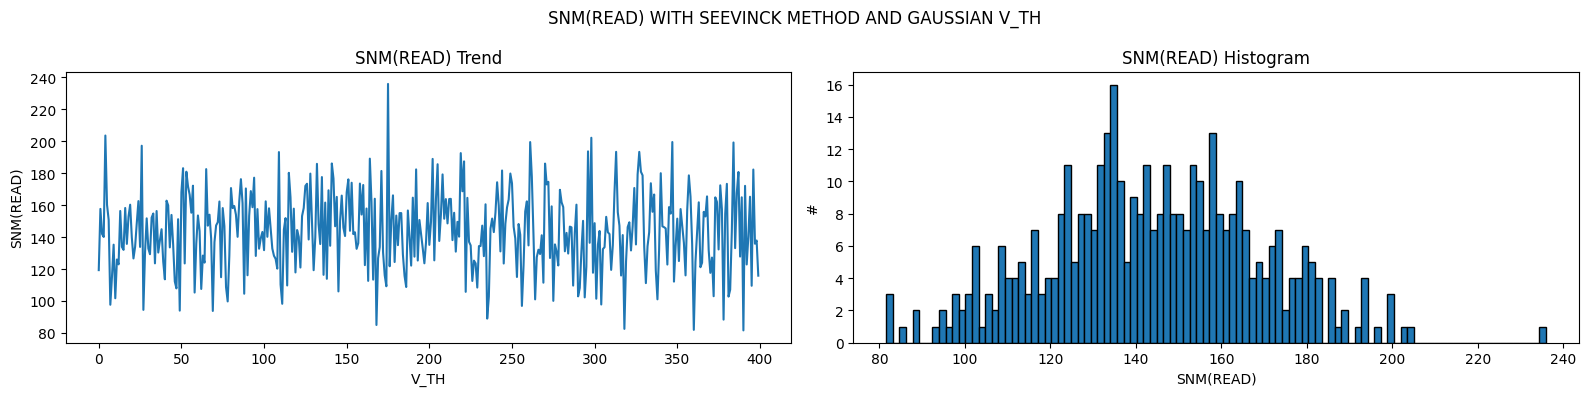

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.suptitle("SNM(READ) WITH SEEVINCK METHOD AND GAUSSIAN V_TH")
axs[0].plot(snm_max_gaussian_vth_read)
axs[0].set_title("SNM(READ) Trend")
axs[0].set_xlabel("V_TH"); axs[0].set_ylabel("SNM(READ)")
axs[1].hist(snm_max_gaussian_vth_read, bins=100, edgecolor='black')
axs[1].set_xlabel("SNM(READ)"); axs[1].set_ylabel("#") 
axs[1].set_title("SNM(READ) Histogram")
plt.tight_layout()
print(f'snm_mean_gaussian_vth_read = {mean(snm_max_gaussian_vth_read)}')
print(f'snm_stdev_gaussian_vth_read = {stdev(snm_max_gaussian_vth_read)}')

save_image(image_path=os.path.join(images, "gaussian_vth_snm_read.png"), plt=plt)
plt.show()

<h2>Gaussian VTH Transient Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

<h3>Read Phase SRAM 6T</h3>